In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

20.566096674192053 -140.68140000230164
1.2822407136601726 168.48218138610184
-7.354664668755689 -66.21222185372375
24.74102293117953 -49.16577767845297
56.346107687713214 112.6677167334376
54.40238942116258 40.228693375606895
45.38663495905112 107.1841429993367
-29.66884742812651 -43.05940438296227
-39.84274710450295 146.5311966252371
45.46042670066092 141.02660878142785
44.1742091832904 -20.7677383090535
-41.98177207456329 -174.7319427019535
-53.15028814849444 -109.27286009000728
-7.066841883193462 -105.15626168134912
56.451053617193594 -3.3969404708379045
24.076439553837957 -32.23289433967082
-86.59701306070443 -68.61900037318733
-56.167862084360536 -36.29187030193066
-37.64979468514629 -104.30676388460708
44.15516666515833 44.904825034291264
-88.6344351901207 -70.29678298389913
-36.27166027696107 -20.73097445879162
70.13617635185591 20.150154688571376
-45.900519115743194 39.73112355286543
-43.5634449965364 177.58284664079747
-76.80474393470438 93.5432430433109
-50.12668343763192 -74

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | bairiki
Processing Record 3 of Set 1 | pauini
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | yanchukan
City not found. Skipping...
Processing Record 6 of Set 1 | spassk-ryazanskiy
Processing Record 7 of Set 1 | mandalgovi
Processing Record 8 of Set 1 | imbituba
Processing Record 9 of Set 1 | devonport
Processing Record 10 of Set 1 | wakkanai
Processing Record 11 of Set 1 | vila franca do campo
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | new scone
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | kayasula
Processing Record 21 of Set 1 | sao joao da barra
Processing Record 22 of Set 1 | lyngseidet
Processing Record 23 of Set 1 | east london


Processing Record 33 of Set 4 | klaksvik
Processing Record 34 of Set 4 | erzin
Processing Record 35 of Set 4 | bucerias
Processing Record 36 of Set 4 | saint-philippe
Processing Record 37 of Set 4 | alice springs
Processing Record 38 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 39 of Set 4 | bilma
Processing Record 40 of Set 4 | lagoa
Processing Record 41 of Set 4 | saskylakh
Processing Record 42 of Set 4 | faisalabad
Processing Record 43 of Set 4 | zatoka
Processing Record 44 of Set 4 | prince rupert
Processing Record 45 of Set 4 | platanos
Processing Record 46 of Set 4 | moose factory
Processing Record 47 of Set 4 | touros
Processing Record 48 of Set 4 | saint anthony
Processing Record 49 of Set 4 | rosarito
Processing Record 50 of Set 4 | la tuque
Processing Record 1 of Set 5 | nanakuli
Processing Record 2 of Set 5 | puri
Processing Record 3 of Set 5 | bengkulu
Processing Record 4 of Set 5 | hervey bay
Processing Record 5 of Set 5 | jumla
Processing Record 6

Processing Record 27 of Set 8 | marystown
Processing Record 28 of Set 8 | mahebourg
Processing Record 29 of Set 8 | souillac
Processing Record 30 of Set 8 | tres arroyos
Processing Record 31 of Set 8 | leshukonskoye
Processing Record 32 of Set 8 | teya
Processing Record 33 of Set 8 | coquimbo
Processing Record 34 of Set 8 | fuengirola
Processing Record 35 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 36 of Set 8 | barra do bugres
Processing Record 37 of Set 8 | pitimbu
Processing Record 38 of Set 8 | solhan
Processing Record 39 of Set 8 | rocky mountain house
Processing Record 40 of Set 8 | hokitika
Processing Record 41 of Set 8 | diamantino
Processing Record 42 of Set 8 | kyren
Processing Record 43 of Set 8 | rocha
Processing Record 44 of Set 8 | high level
Processing Record 45 of Set 8 | camacha
Processing Record 46 of Set 8 | san andres
Processing Record 47 of Set 8 | qena
Processing Record 48 of Set 8 | mbekenyera
Processing Record 49 of Set 8 | tilichiki
Pro

Processing Record 16 of Set 12 | salinas
Processing Record 17 of Set 12 | lappeenranta
Processing Record 18 of Set 12 | gelemso
Processing Record 19 of Set 12 | tatawin
Processing Record 20 of Set 12 | orange cove
Processing Record 21 of Set 12 | puro
Processing Record 22 of Set 12 | ketchikan
Processing Record 23 of Set 12 | saint-joseph
Processing Record 24 of Set 12 | paita
Processing Record 25 of Set 12 | muros
Processing Record 26 of Set 12 | tautira
Processing Record 27 of Set 12 | hovd
Processing Record 28 of Set 12 | lake charles
Processing Record 29 of Set 12 | dekoa
City not found. Skipping...
Processing Record 30 of Set 12 | mount isa
Processing Record 31 of Set 12 | skopin
Processing Record 32 of Set 12 | talnakh
Processing Record 33 of Set 12 | denau
City not found. Skipping...
Processing Record 34 of Set 12 | taree
Processing Record 35 of Set 12 | viligili
City not found. Skipping...
Processing Record 36 of Set 12 | ormond beach
Processing Record 37 of Set 12 | geraldton


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,81.28,88,100,8.05,US,2022-11-30 02:33:52
1,Bairiki,1.3292,172.9752,84.20,74,40,9.22,KI,2022-11-30 02:33:53
2,Pauini,-7.7136,-66.9764,75.92,82,92,3.96,BR,2022-11-30 02:33:53
3,Codrington,-38.2667,141.9667,61.18,67,94,12.26,AU,2022-11-30 02:33:53
4,Spassk-Ryazanskiy,54.4072,40.3806,16.39,94,45,5.03,RU,2022-11-30 02:33:54
5,Mandalgovi,45.7625,106.2708,-0.18,42,0,6.91,MN,2022-11-30 02:33:55
6,Imbituba,-28.2400,-48.6703,72.86,94,95,10.40,BR,2022-11-30 02:33:55
7,Devonport,-41.1667,146.3500,67.08,55,48,13.00,AU,2022-11-30 02:32:15
8,Wakkanai,45.4094,141.6739,24.78,80,75,25.32,JP,2022-11-30 02:33:55
9,Vila Franca Do Campo,37.7167,-25.4333,64.20,84,95,3.62,PT,2022-11-30 02:33:56


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/29/22'

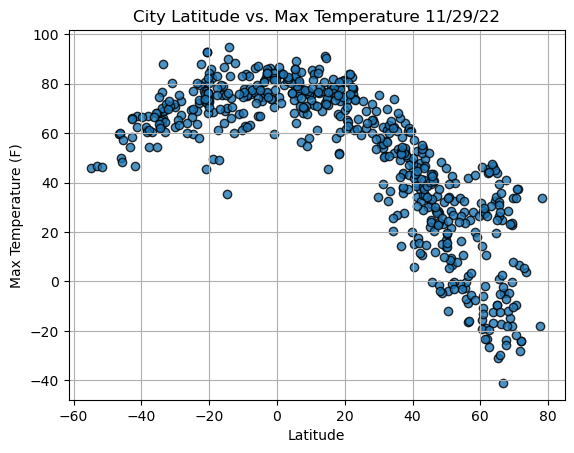

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

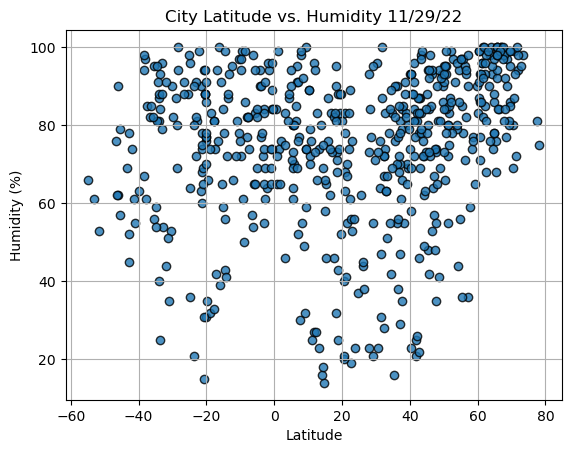

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

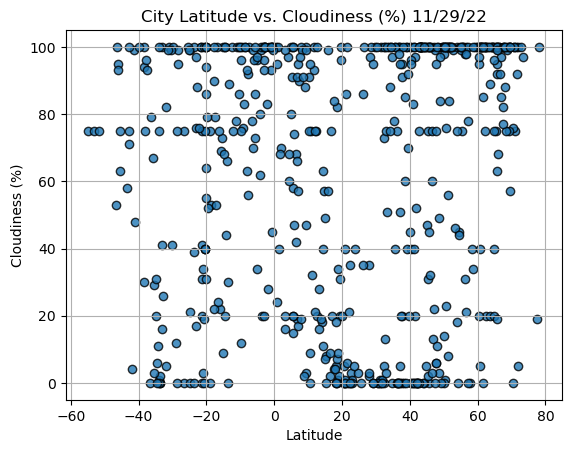

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

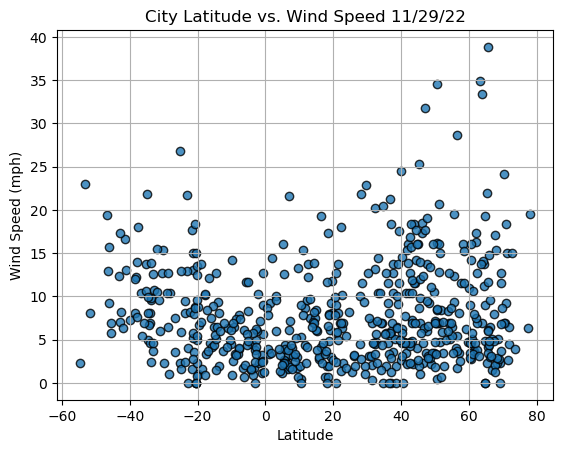

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

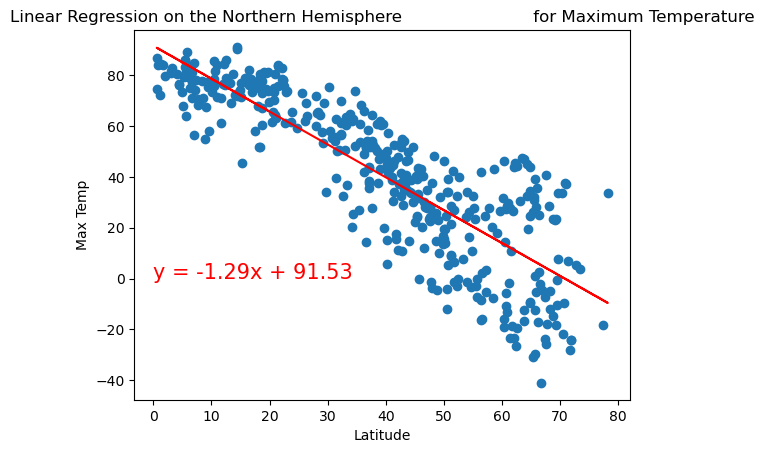

In [21]:
# Linear regression on the Northern Hemisphere - Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,0))

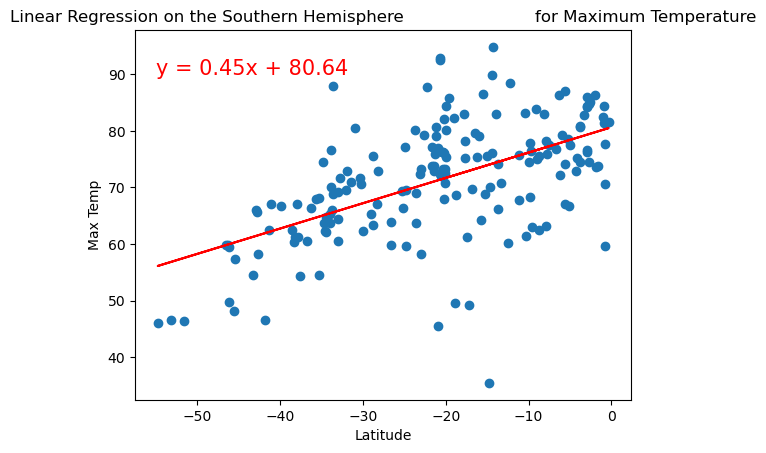

In [22]:
# Linear regression on the Southern Hemisphere - Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,90))

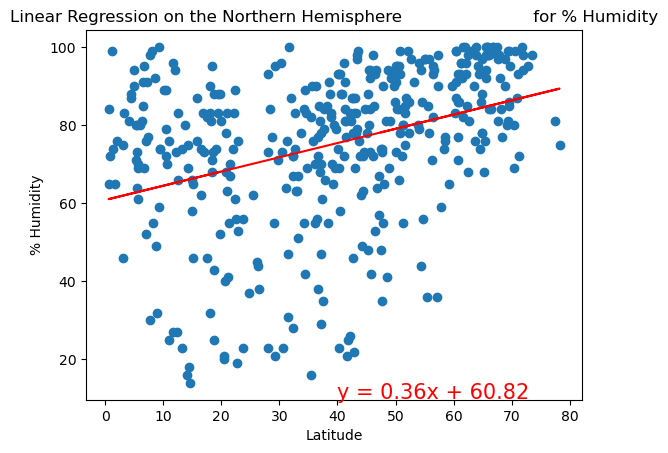

In [23]:
# Linear regression on the Northern Hemisphere - Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

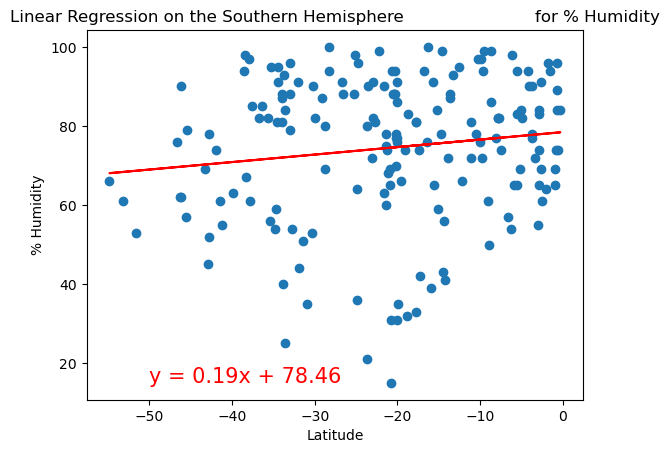

In [24]:
# Linear regression on the Southern Hemisphere - Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

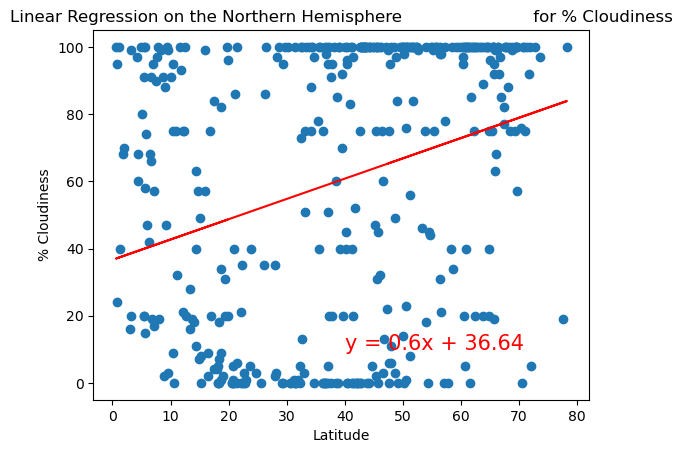

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

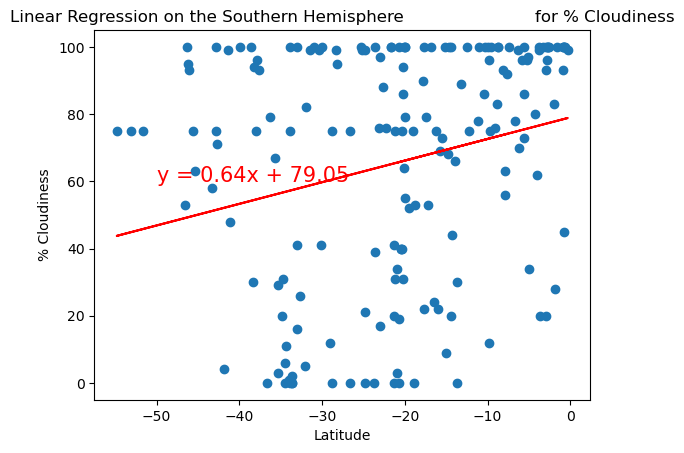

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

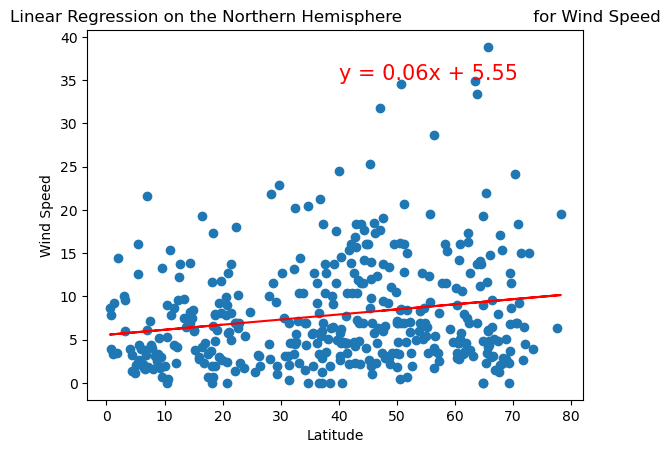

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

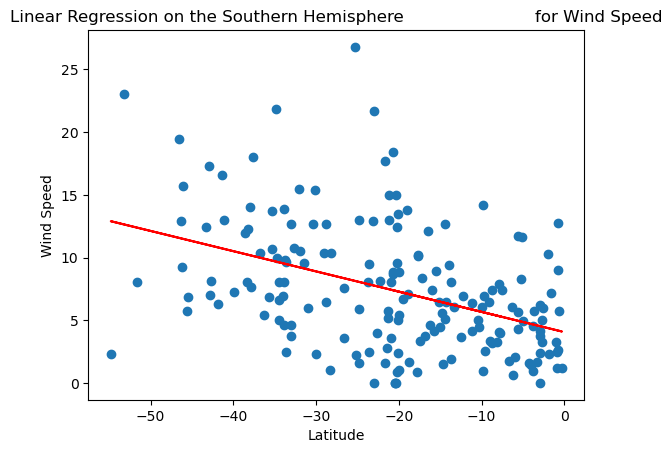

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))